In [4]:
# Renatto Esteban Guzmán Sosa 
# Carné 21646
# Modelación y Simulación
# Fecha 19/07/2024
# Laboratorio 1

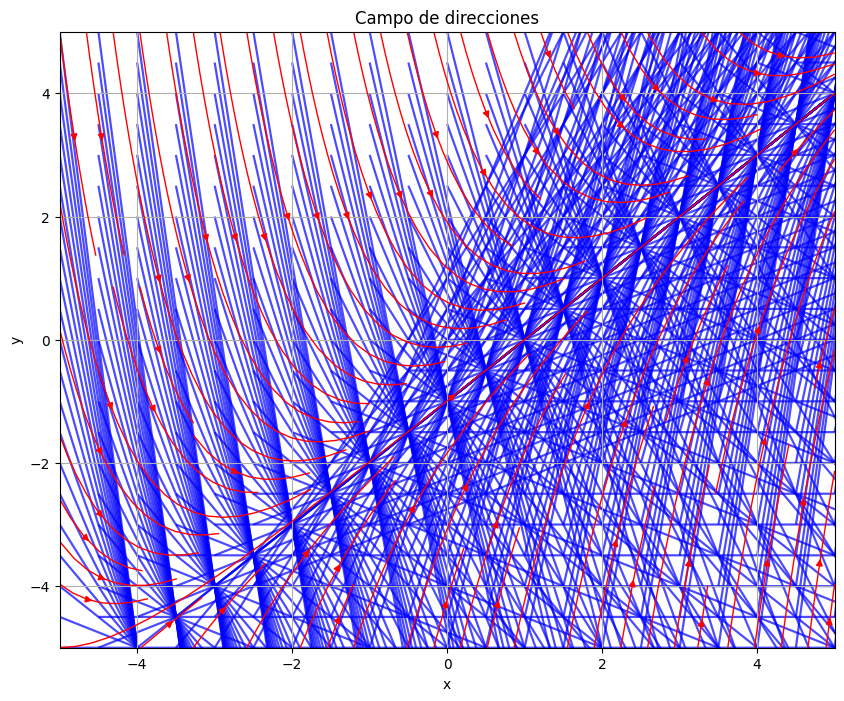

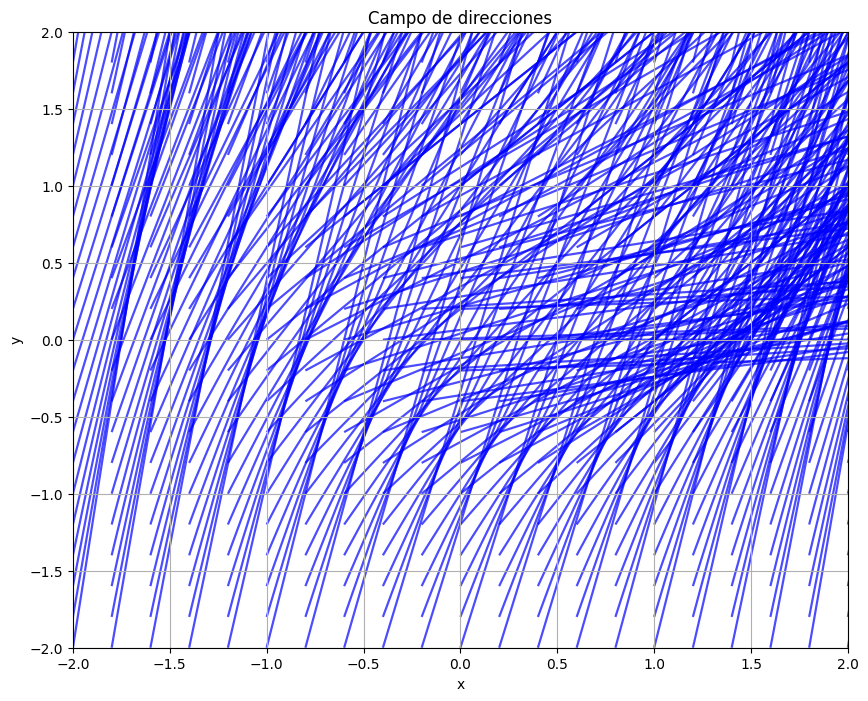

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def graficar_campo_direcciones(f, xmin, xmax, ymin, ymax, xstep, ystep, escala=1, unitario=False, flujo=False):
    """
    Grafica el campo de direcciones de una ecuación diferencial de primer orden.

    Parámetros:
    f : función que define la ecuación diferencial dy/dx = f(x,y)
    xmin, xmax : límites del eje x
    ymin, ymax : límites del eje y
    xstep, ystep : pasos para subdividir los ejes x e y
    escala : factor de escala para las flechas (por defecto 1)
    unitario : si es True, grafica el campo unitario (por defecto False)
    flujo : si es True, grafica las líneas de flujo (por defecto False)
    
    Retorna:
    fig : objeto Figure de matplotlib
    """
    
    # Crear la rejilla de puntos
    x = np.arange(xmin, xmax + xstep, xstep)
    y = np.arange(ymin, ymax + ystep, ystep)
    X, Y = np.meshgrid(x, y)
    
    # Calcular los componentes del campo vectorial
    U = np.ones_like(X)
    V = f(X, Y)
    
    # Normalizar si se requiere el campo unitario
    if unitario:
        norm = np.sqrt(U**2 + V**2)
        U /= norm
        V /= norm
    
    # Crear la figura y los ejes
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Graficar el campo de direcciones
    ax.quiver(X, Y, U, V, scale=1/escala, scale_units='xy', angles='xy', color='b', alpha=0.7)
    
    # Graficar las líneas de flujo si se solicita
    if flujo:
        ax.streamplot(X, Y, U, V, color='r', density=1, linewidth=1, arrowsize=1)
    
    # Configurar los límites y etiquetas
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Campo de direcciones')
    ax.grid(True)
    
    return fig

# Ejemplo 1: dy/dx = x - y
def f1(x, y):
    return x - y

fig1 = graficar_campo_direcciones(f1, -5, 5, -5, 5, 0.5, 0.5, escala=20, flujo=True)
plt.show()

# Ejemplo 2: dy/dx = x^2 + y^2
def f2(x, y):
    return x**2 + y**2

fig2 = graficar_campo_direcciones(f2, -2, 2, -2, 2, 0.2, 0.2, escala=10, unitario=True)
plt.show()